In [ ]:
q30.

[*********************100%***********************]  1 of 1 completed
# of times Amazon gave positive NIght Returns : 122
# of times Amazon gave Negative NIght Returns : 117
Cumulative % night Returns in Amazon : 106.43735347378626
Sharp Ratio for night Returns in Amazon : 72.40023170856604
Cumulative % day Returns in Amazon : -11.038128141677461
Sharp Ratio for day Returns in Amazon : -9.825886839511638
Cumulative Gap Open Returns in Amazon : 0.987400311918174
Sharp Ratio for Gap Open Returns in Amazon : -1.4087046783407828
Cumulative BuyNhold Returns in Amazon : 123.346944387482
Sharp Ratio for BuyNhold Returns in Amazon : 84.23597826562478






[*********************100%***********************]  1 of 1 completed
# of times Apple gave positive NIght Returns : 110
# of times Apple gave Negative NIght Returns : 105
Cumulative % night Returns in Apple : 25.96679623425313
Sharp Ratio for night Returns in Apple : 15.259744885768388
Cumulative % day Returns in Apple : 23.483173696998794
Sh

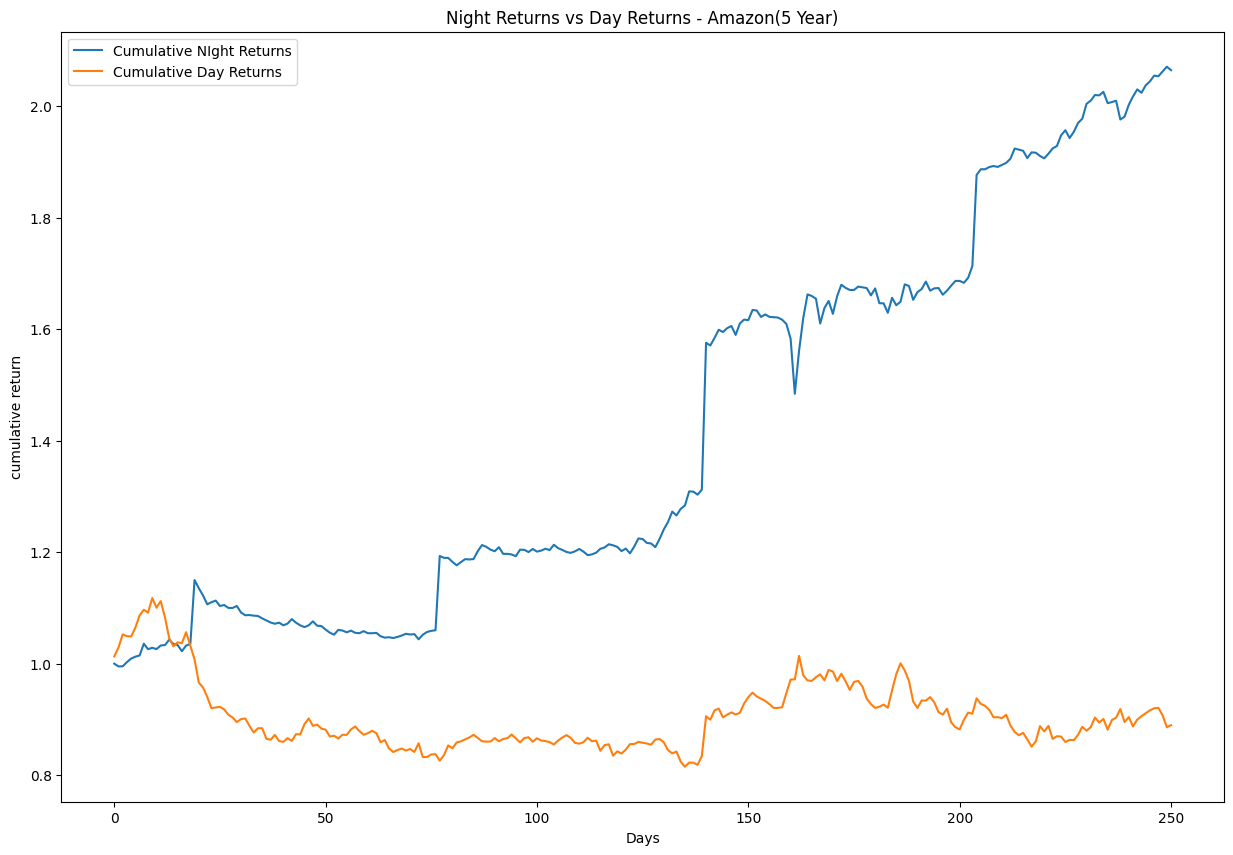

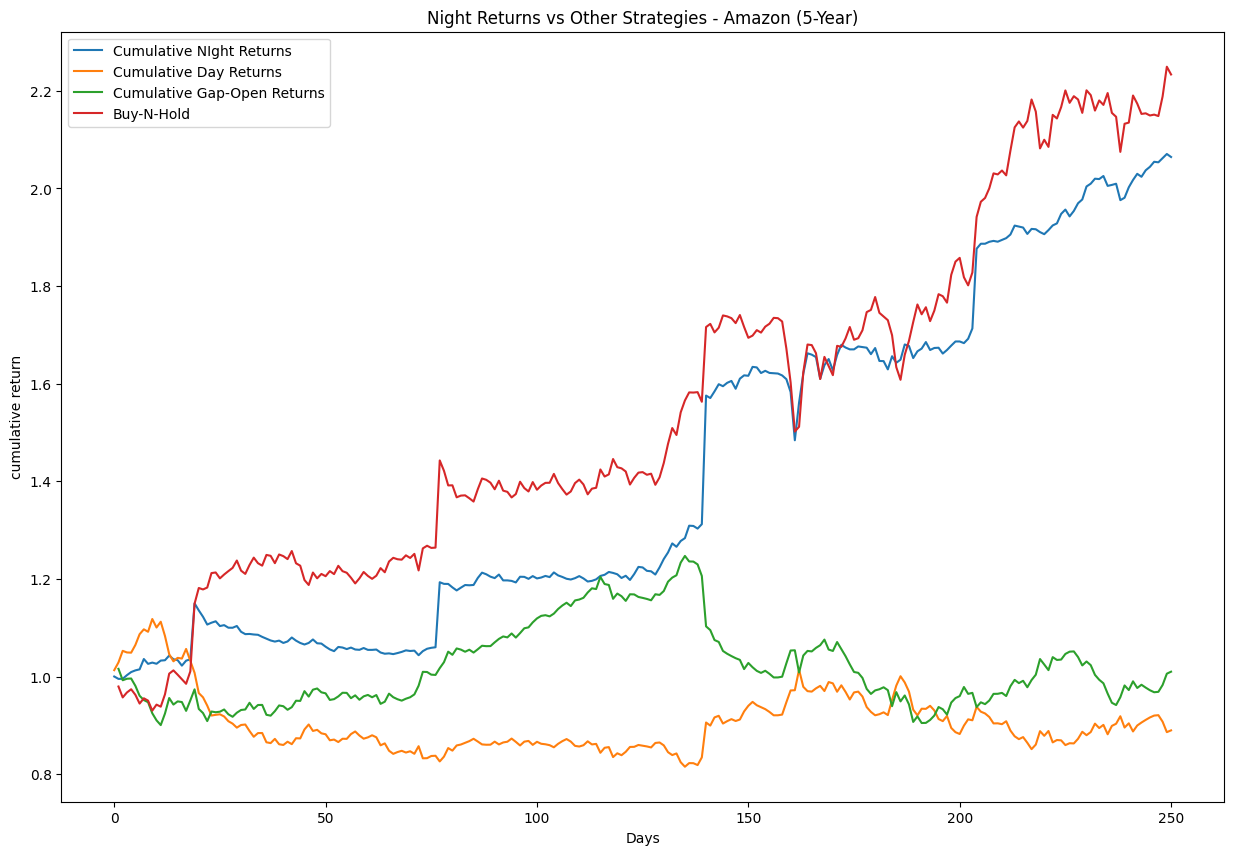

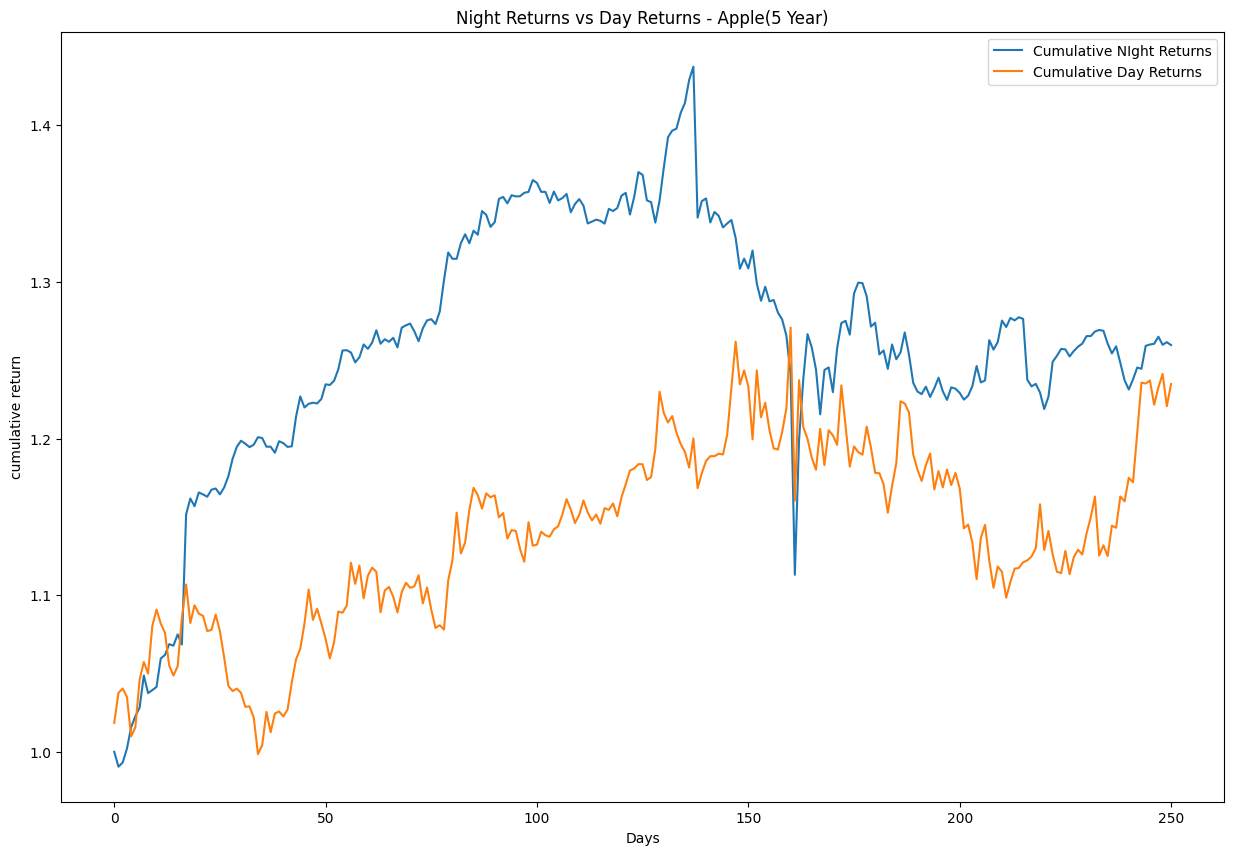

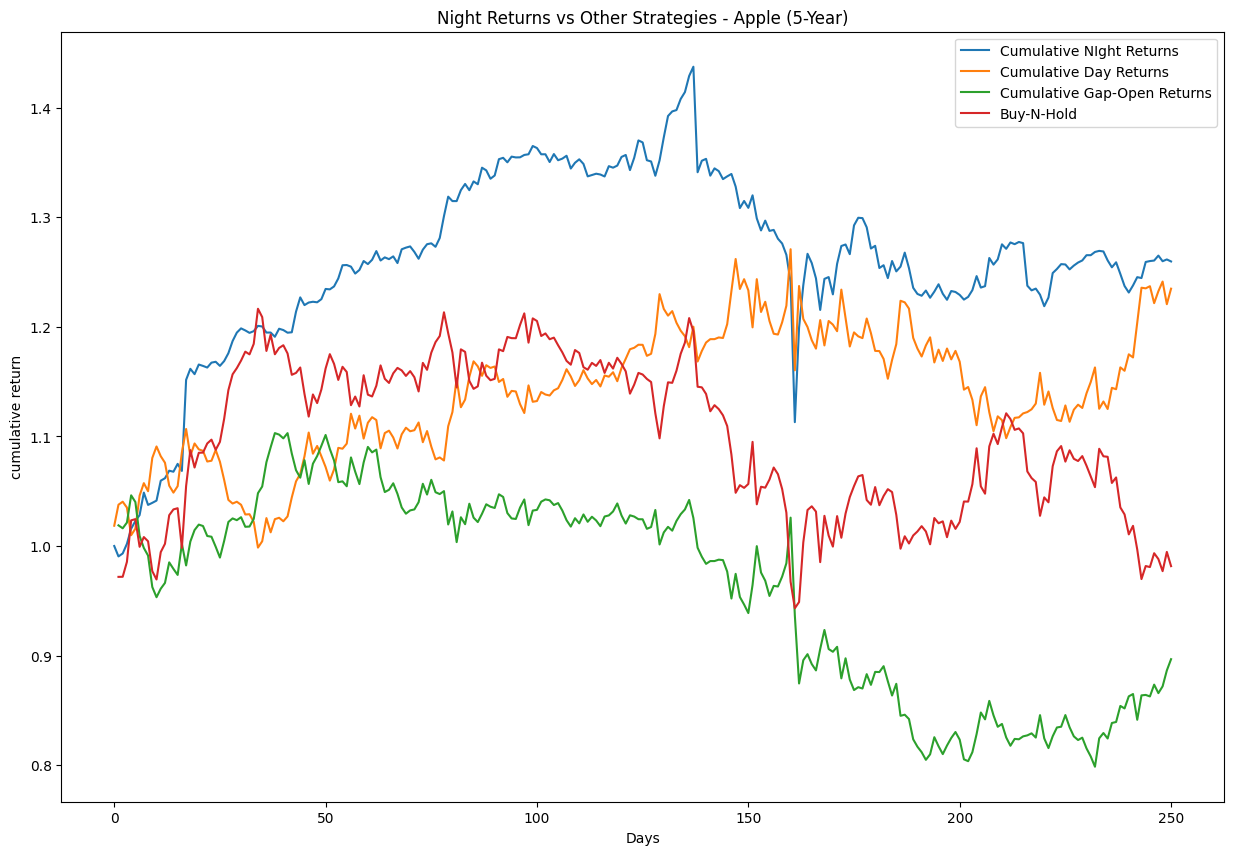

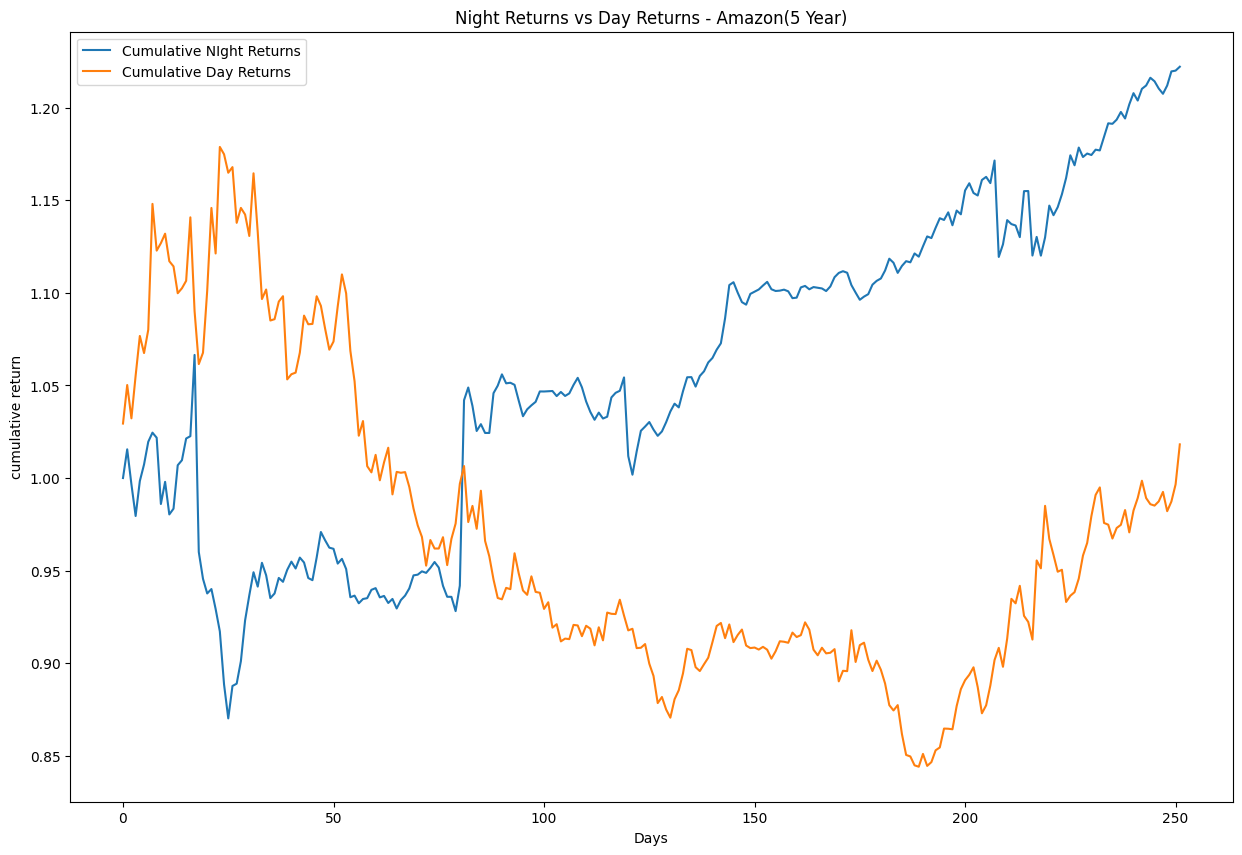

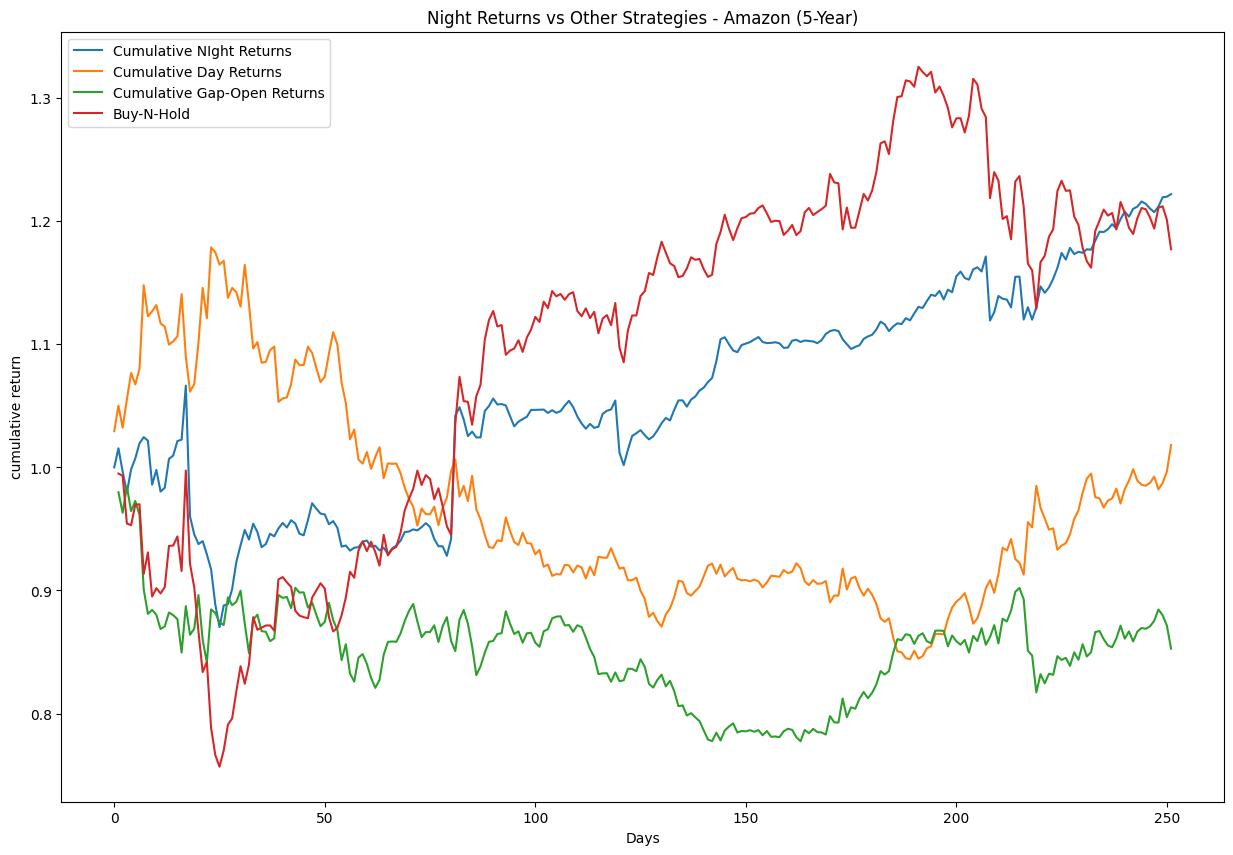

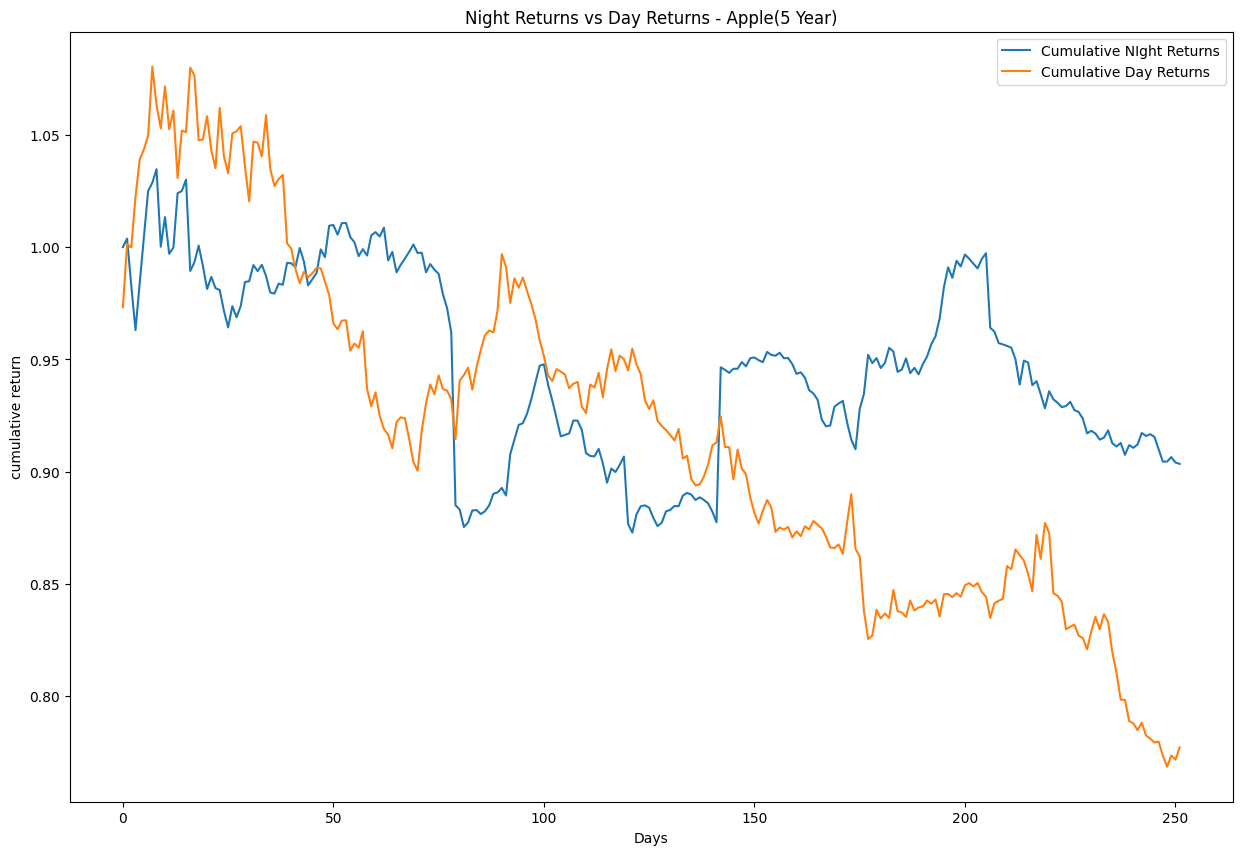

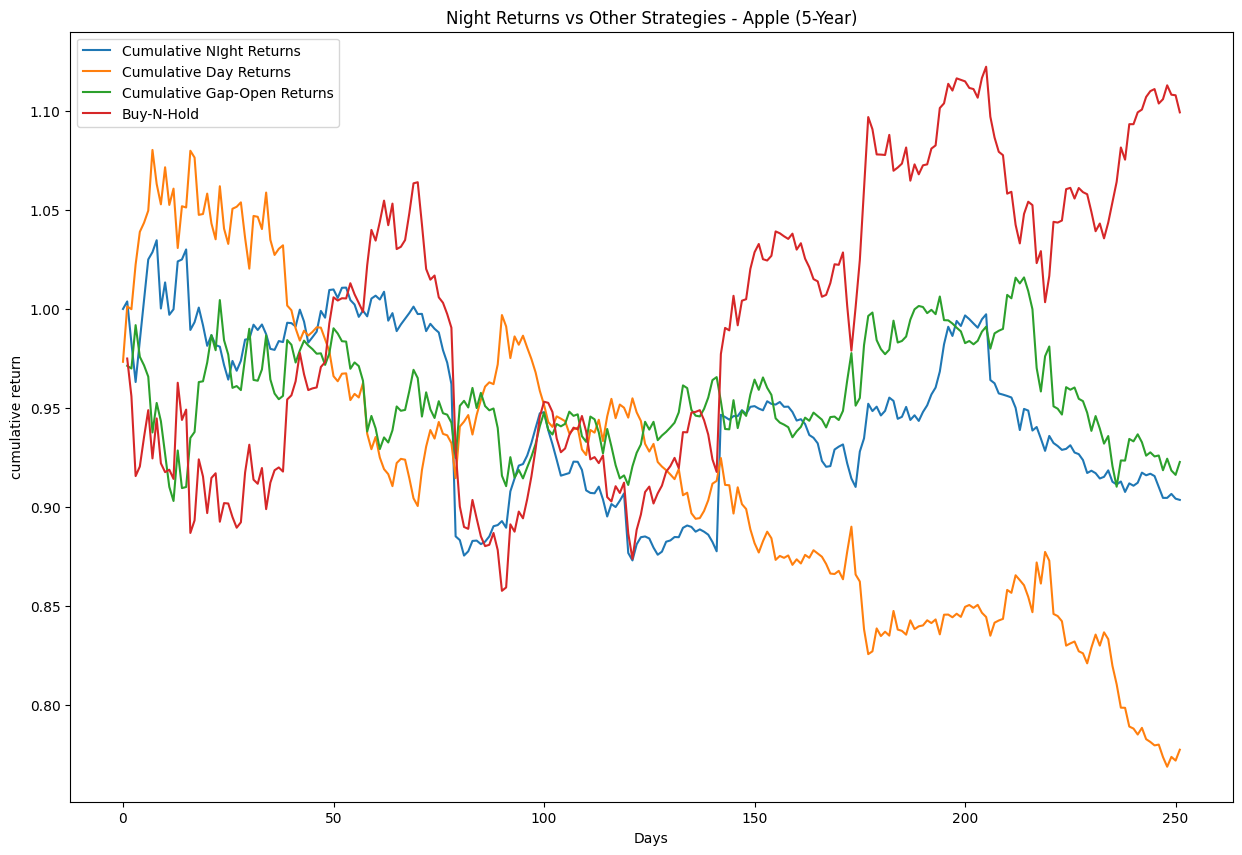

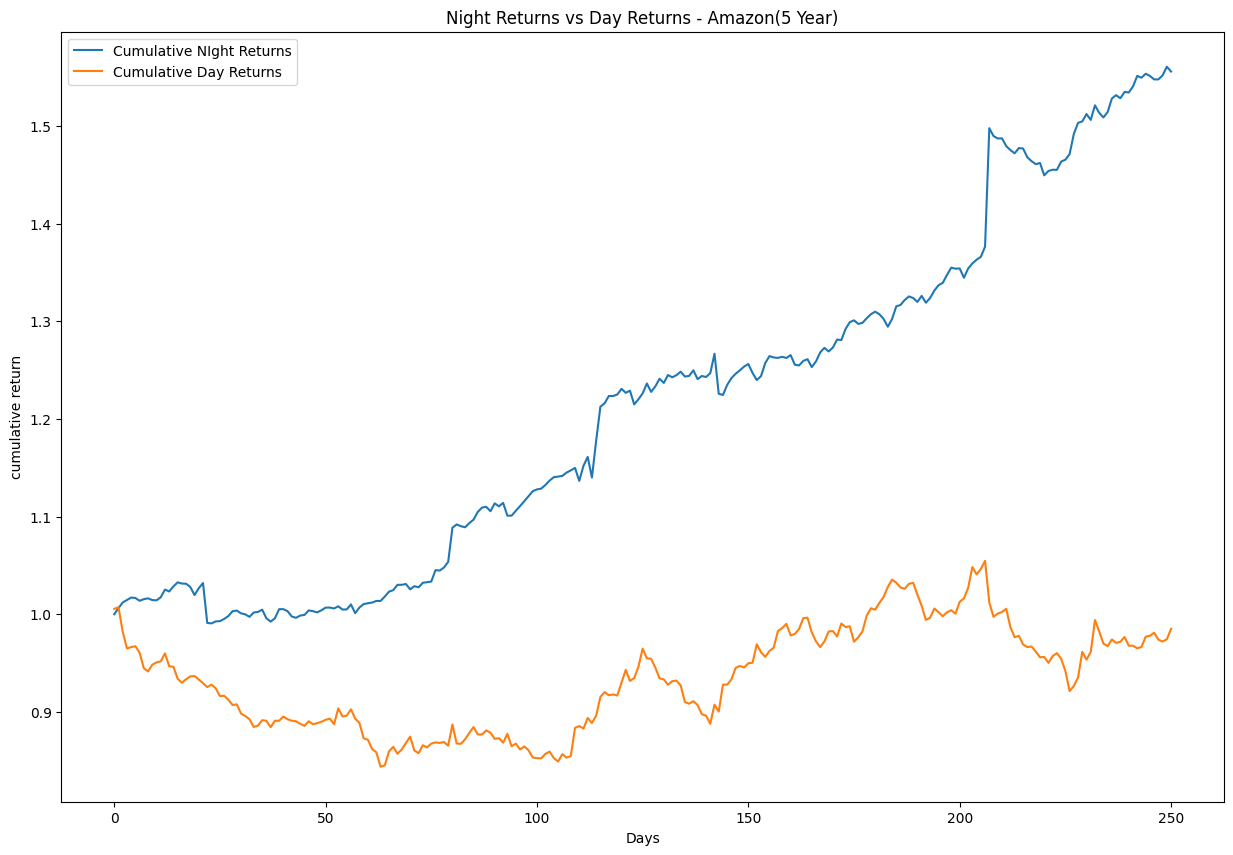

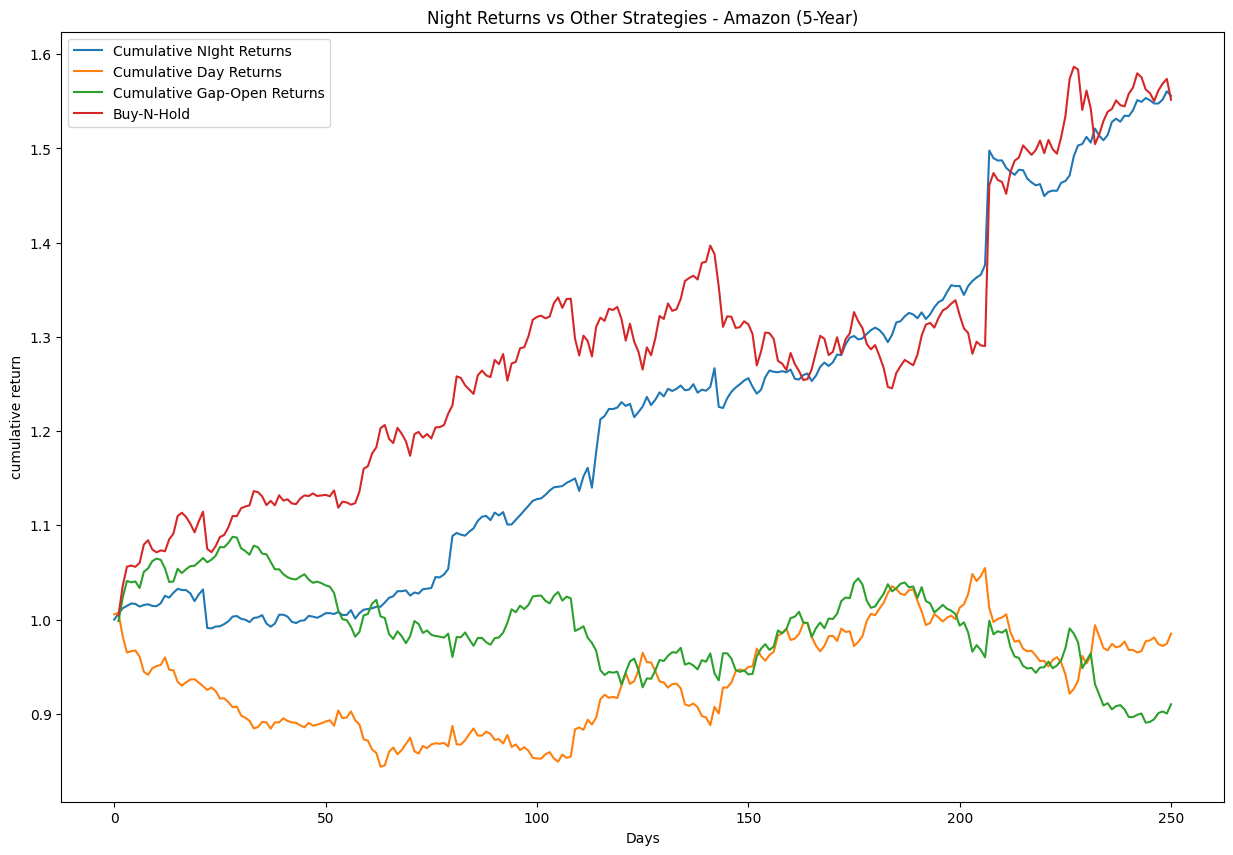

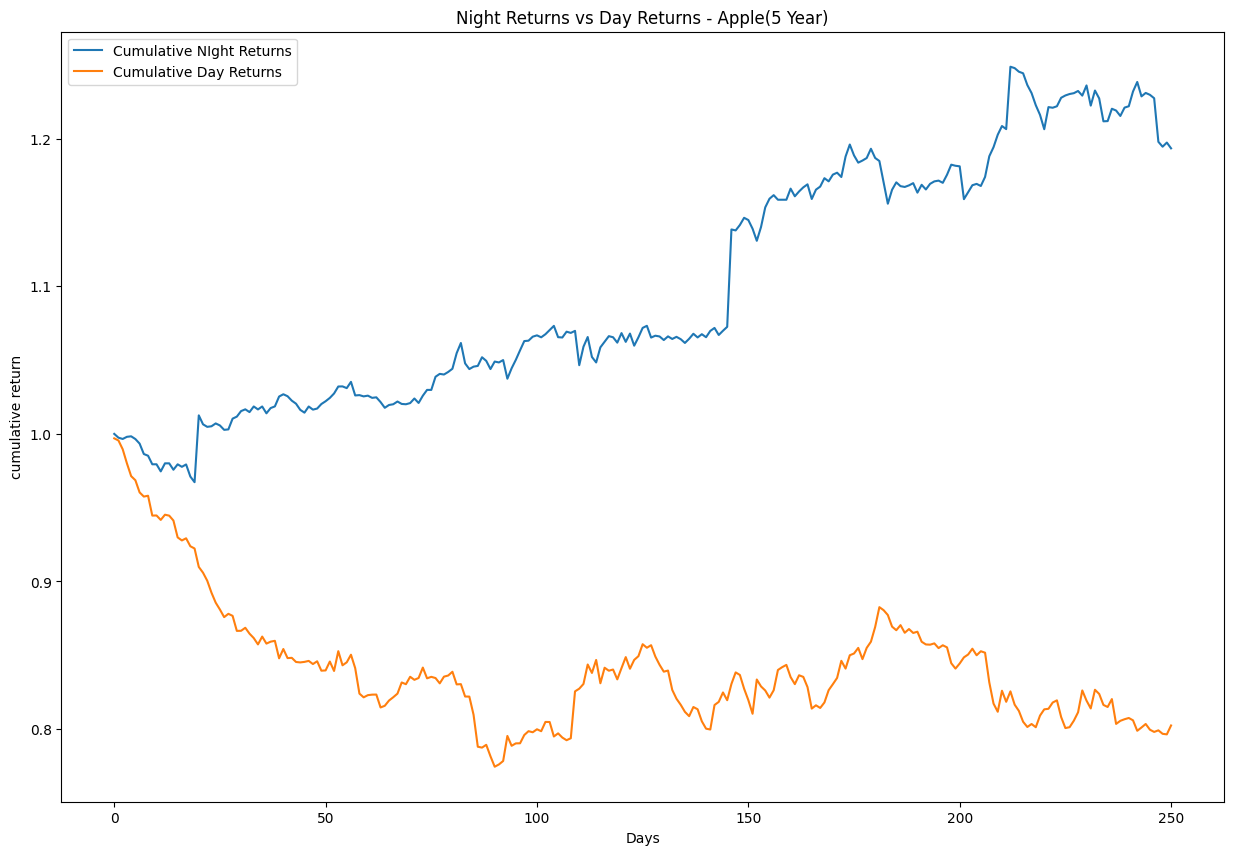

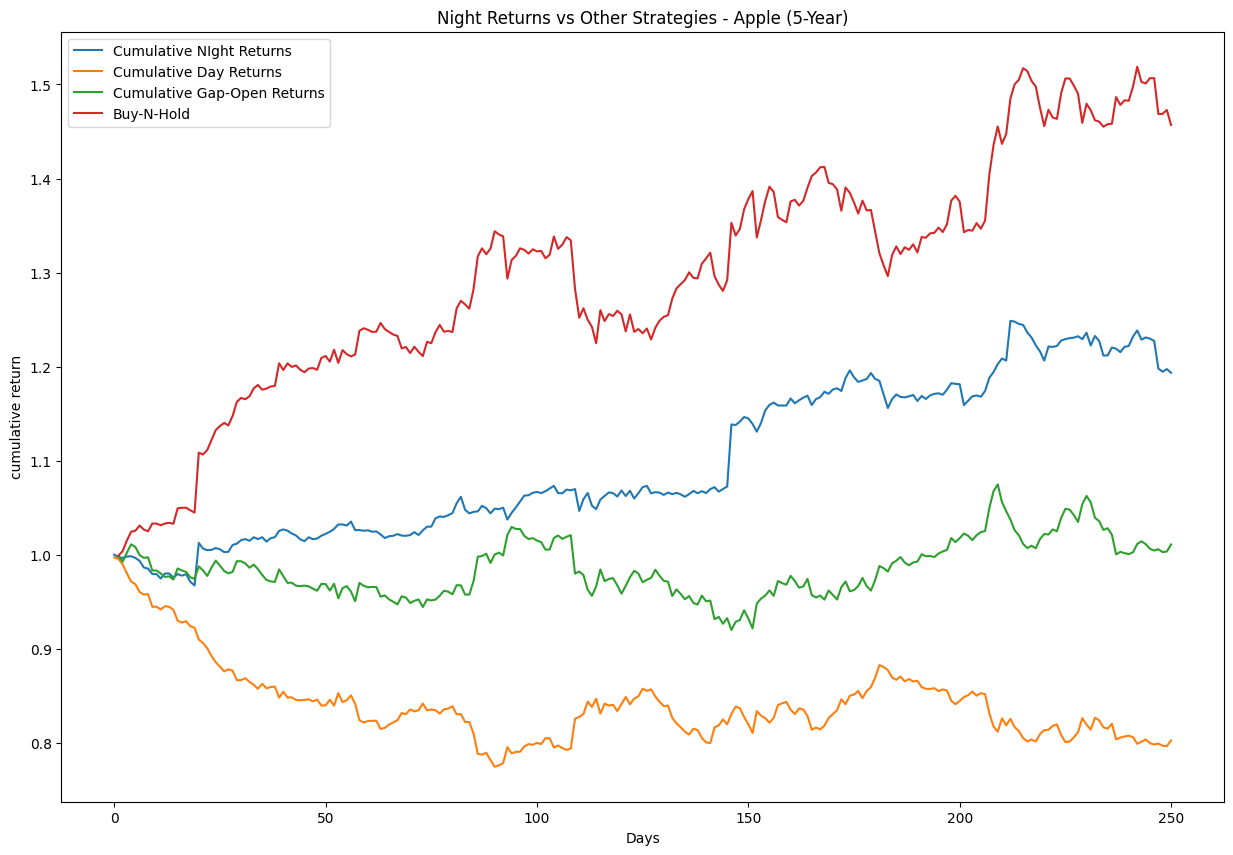

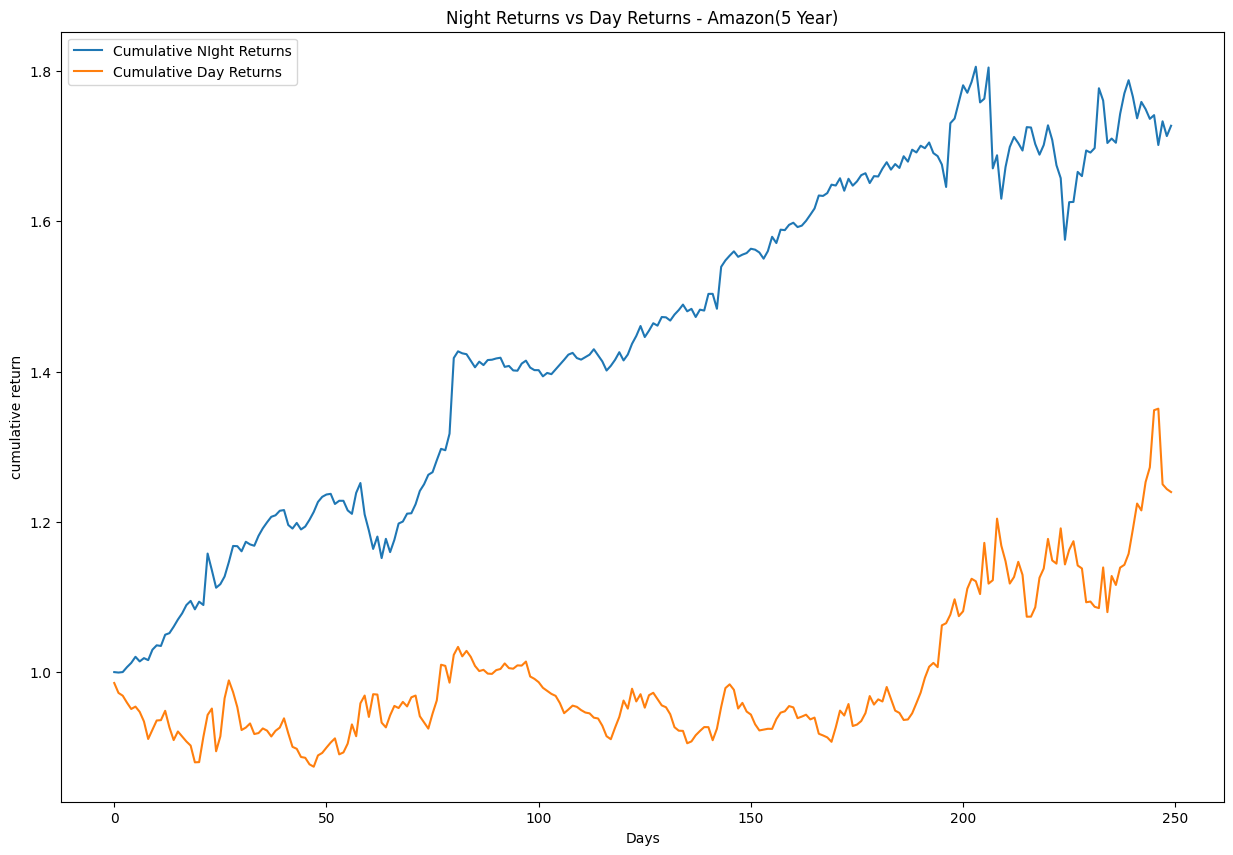

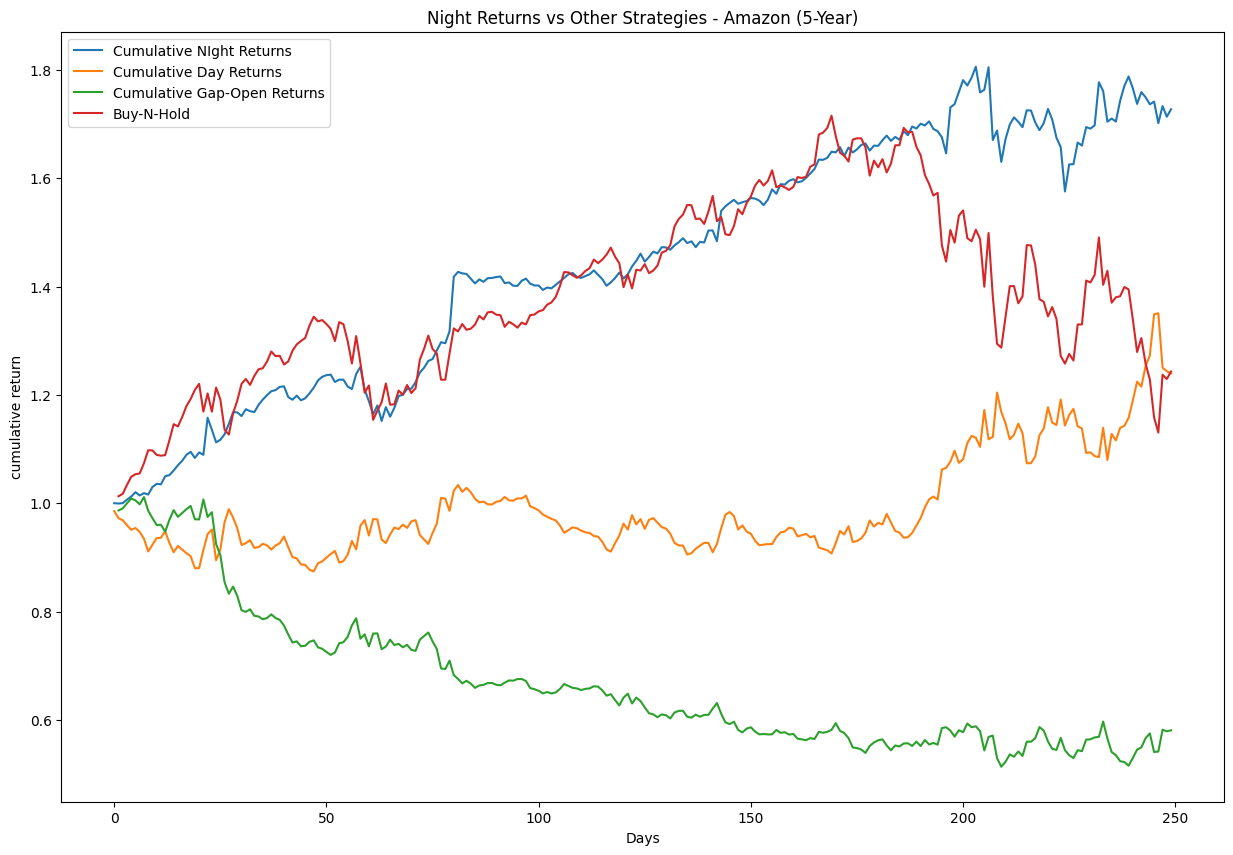

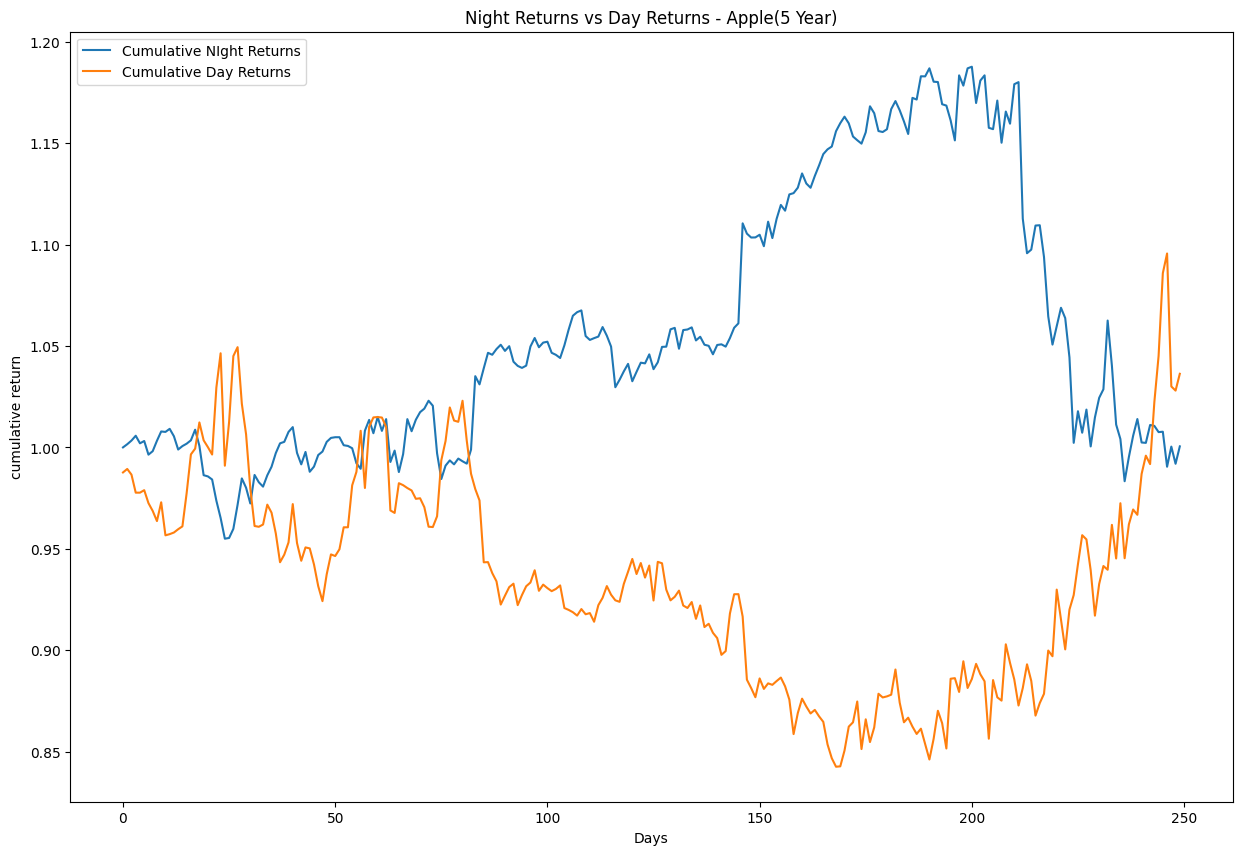

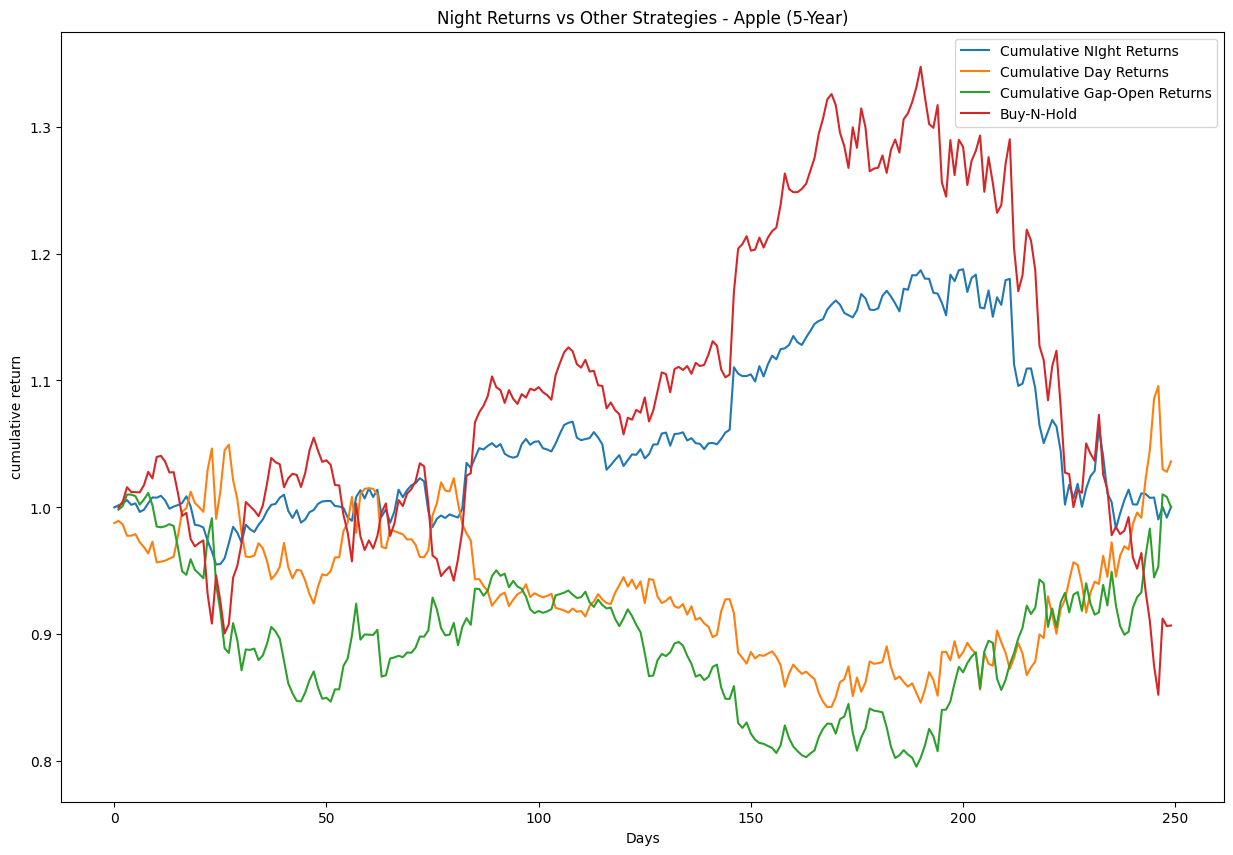

In [ ]:
#%%
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def analysis(name,symbol,start_date,end_date):

    assumedRFR=3

    def shapeRatio(returns,values,rfr):

        return ((returns - rfr)/np.std(values))


    data = yf.download(symbol, start= start_date, end= end_date)


    data = pd.DataFrame(data)
    data.reset_index(inplace=True)
    data.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)


    data['Night_Return %'] = ((data['Open'] - data['Close'].shift(1))/data['Close'].shift(1))
    data['Night_Return %'] = data['Night_Return %'].fillna(0)

    data['Day_Return %'] = ((data['Open'] - data['Close'])/data['Open'])


    Nightly_Positive_count = data['Night_Return %'].gt(0).value_counts()[1]
    Nightly_Negative_count = data['Night_Return %'].lt(0).value_counts()[1]
    print("# of times {} gave positive NIght Returns : {}".format(name,Nightly_Positive_count))
    print("# of times {} gave Negative NIght Returns : {}".format(name,Nightly_Negative_count))

    data["position"] = np.nan
    data.loc[data["Open"] >= data["Close"].shift(1), "position"] = 1
    data.loc[data["Open"] < data["Close"].shift(1), "position"] = -1

    data["rtn"] = (data['Close'] - data['Open']) / data['Open']
    data['strategy_rtn'] = data["rtn"] * data["position"]


    data['strategy_cum_rtn'] = (data['strategy_rtn'] + 1).cumprod()


    data["daily_rtn"] = data["Close"].pct_change()
    data['bh_cum_rtn'] = (data['daily_rtn'] + 1).cumprod()
    Cumm_night_data = (1+data['Night_Return %']).cumprod()
    Cumm_day_data = (1+data['Day_Return %']).cumprod()
    Gap_Open_Strategy = (data['strategy_rtn'] + 1).cumprod()
    BuyNhold = (data['daily_rtn'] + 1).cumprod()

    Cumm_night_data.reset_index(drop=True, inplace=True)

    cnr=(Cumm_night_data[len(Cumm_night_data) - 1] -1) * 100
    cdr=((Cumm_day_data[len(Cumm_day_data) - 1] -1)*100 )
    cgr=((Gap_Open_Strategy[len(Gap_Open_Strategy) - 1]-1 ) * 100)
    cbr=((BuyNhold[len(BuyNhold) - 1]-1) * 100)

    print("Cumulative % night Returns in {} : {}".format(name, cnr ))
    print("Sharp Ratio for night Returns in {} : {}".format(name,shapeRatio(cnr ,data["rtn"].values*100,assumedRFR)))
    print("Cumulative % day Returns in {} : {}".format(name,cdr ))
    print("Sharp Ratio for day Returns in {} : {}".format(name,shapeRatio(cdr ,data["rtn"].values*100,assumedRFR)))
    print("Cumulative Gap Open Returns in {} : {}".format(name,cgr ))
    print("Sharp Ratio for Gap Open Returns in {} : {}".format(name,shapeRatio(cgr ,data["rtn"].values*100,assumedRFR)))
    print("Cumulative BuyNhold Returns in {} : {}".format(name, cbr))
    print("Sharp Ratio for BuyNhold Returns in {} : {}".format(name,shapeRatio(cbr ,data["rtn"].values*100,assumedRFR)))

    results=[cnr,cdr,cgr,cbr]


    fig, ax = plt.subplots(figsize=(15, 10))

    plt.plot(Cumm_night_data)
    plt.plot(Cumm_day_data)

    plt.title("Night Returns vs Day Returns - {}(5 Year)".format(name))
    plt.ylabel("cumulative return")
    plt.xlabel("Days")
    ax.legend(["Cumulative NIght Returns","Cumulative Day Returns"])


    fig, ax = plt.subplots(figsize=(15, 10))

    plt.plot(Cumm_night_data)
    plt.plot(Cumm_day_data)
    plt.plot(Gap_Open_Strategy)
    plt.plot(BuyNhold)
    plt.title("Night Returns vs Other Strategies - {} (5-Year)".format(name))
    plt.ylabel("cumulative return")
    plt.xlabel("Days")
    ax.legend(["Cumulative NIght Returns","Cumulative Day Returns","Cumulative Gap-Open Returns","Buy-N-Hold"])
    Cumm_night_data.reset_index(drop=True, inplace=True)

    print("\n"*5)

    return results


start_dates=['2015-01-01','2016-01-01','2017-01-01','2018-01-01']
end_dates=['2015-12-31','2016-12-31','2017-12-31','2018-12-31']

result=[]

for i in range(0,4):
    r1=analysis("Amazon","AMZN",start_dates[i],end_dates[i])
    r2=analysis("Apple","AAPL",start_dates[i],end_dates[i])
    r1=[round(num,2) for num in r1]
    r2=[round(num,2) for num in r2]
    result.append([r1,r2])


final_result=pd.DataFrame(result)
print(final_result)

final_result.to_csv("result.csv")



# %%








